# Лабораторна робота №2
### Блінда Ірина Ігорівна ФІТ 4-4
### Завдання 2
### Тема: Побудувати двонаправлену RNN для розрахунку функції із шумом.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense

In [2]:
# Генерація даних
N = 10000
x = np.linspace(0, 50, N)
data = np.sin(x / 5) + 0.1 * np.random.randn(N)

# Підготовка даних для моделі
def prepare_data(data, steps=5):
    X, y = [], []
    for i in range(len(data) - steps):
        X.append(data[i:(i + steps)])
        y.append(data[i + steps])
    return np.array(X), np.array(y)

steps = 5
X, y = prepare_data(data, steps)
X = X.reshape((X.shape[0], X.shape[1], 1))  # Reshape для RNN

In [3]:
# Побудова моделі
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Навчання моделі
model.fit(X, y, epochs=20, verbose=1)

C:\Users\Admin\miniconda3\Lib\site-packages\keras\src\layers\core\wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.1176
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0120
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0124
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0121
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0122
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0121
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0122
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0120
Epoch 9/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0121
Epoch 10/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0121
Epoch 11/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0121
Epoch 12/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0120
Epoch 13/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0122
Epoch 14/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0119
Epoch 15/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - lo

In [4]:
# Прогнозування
predictions = model.predict(X)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


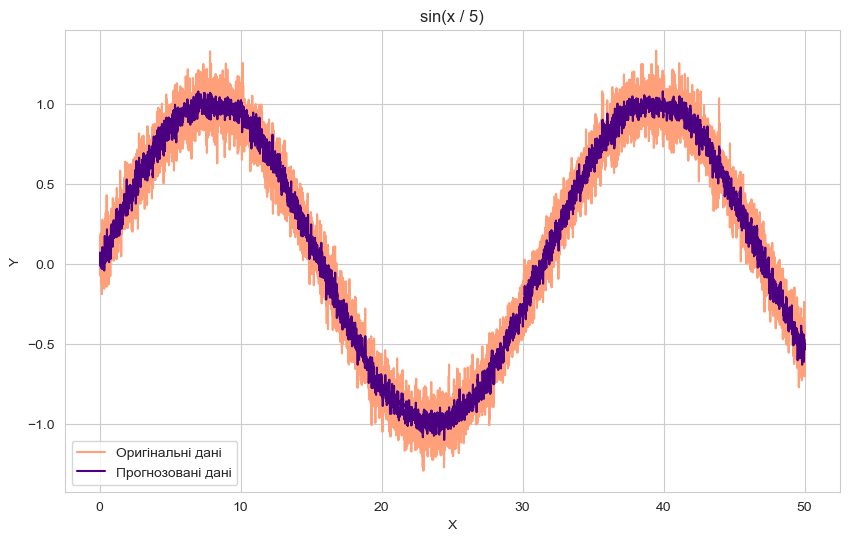

In [5]:
# Побудова графіка
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
plt.plot(x[steps:], data[steps:], label='Оригінальні дані', color="lightsalmon")
plt.plot(x[steps:], predictions[:, 0], label='Прогнозовані дані', color="indigo")
plt.title('sin(x / 5)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# Висновок

У ході лабораторної роботи була побудована двонаправлена рекурентна нейронна мережа (RNN) для розрахунку функції з шумом. Для цього було обрано відповідну архітектуру, кількість шарів та функції активації.

Було створено набір даних, що складається з 10 000 зразків, де кожен зразок представляє собою значення функції з доданим шумом. У якості функцій було взято тригонометричні функції, такі як cos(3x), sin(x/5), sin(x+3)/2 і т. д.

Архітектура мережі включала в себе двонаправлені рекурентні шари з функцією активації relu. Крім того, було додано один повний зв'язаний шар для передбачення вихідного значення.

Після навчання мережі було побудовано графік, який відображає реальні та передбачені значення функції. Цей графік демонструє, наскільки добре навчена мережа може апроксимувати вихідну функцію навіть у випадку наявності шуму в даних.

Отже, результати лабораторної роботи підтверджують ефективність застосування двонаправленої RNN для розрахунку функцій з шумом, що може бути корисним для моделювання та прогнозування реальних даних з нестабільністю.